<a href="https://colab.research.google.com/github/Roumyajit/Almabetter/blob/main/Airbnb_NYC_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** -

**Title**: Exploratory Data Analysis of Airbnb Listings in NYC

**Contribution**: Individual

# **Project Summary** -

A concise overview explaining the purpose, dataset details, methods used, and key insights

# **Github Link** -

# **Problem Statement** -

What factors affect Airbnb listing prices in New York City, and how do room types, availability, and neighborhood groups influence customer and host behavior?

# **Business Objective** -

Provide insights to optimize pricing, improve host performance, and identify customer preferences for targeted marketing.

# **Dataset Overview** -

**Steps**:

1.   Load the dataset.
2.   Check its structure.
3.   Explore missing values, duplicate records, and basic statistics.

# **Data Wrangling** -

Clean the dataset by handling missing values, outliers, and formatting issues.

# **Visualizations** -



1.   Create at least 10 charts.
2.   Explain why you chose each chart, the insights it provides, and its business impact.



# **Statistical Analysis** -

Correlation heatmap and pair plots for relationships.

# **Solution to Business Objective** -

Recommend strategies based on findings.

# **Conclusion** -

Summarize the results and key takeaways.

# **Step 1: Dataset Overview** -

We will start with loading the dataset and exploring its structure.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/Airbnb NYC 2019 (1).csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check dataset structure
print(data.info())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate records
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Basic statistics
print(data.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

# **Step 2: Data Cleaning** -

**Clean the dataset for analysis:**


1.   Handle missing values.
2.   Remove duplicate rows.
3.   Format columns correctly.
4.   Filter outliers.



In [3]:
# Fill missing values in 'reviews_per_month' with 0
data['reviews_per_month'].fillna(0, inplace=True)

# Remove duplicates
data = data.drop_duplicates()

# Remove outliers in price
data = data[data['price'] <= 5000]

# Convert 'last_review' to datetime
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Verify cleaning
print("Cleaned dataset shape:", data.shape)
print(data.isnull().sum())

Cleaned dataset shape: (48875, 16)
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10041
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<ipython-input-3-58b1345dbb72>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(0, inplace=True)


# **Step 3: Visualizations** -

**UBM Rule:**

1.   **U:** Univariate analysis
2.   **B:** Bivariate analysis
3.   **M:** Multivariate analysis





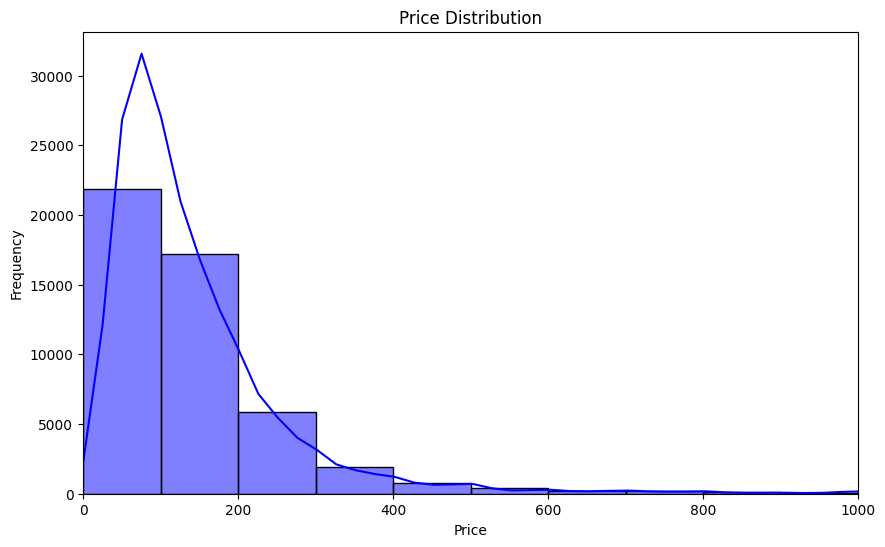

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xlim(0, 1000)
plt.show()

**Insights:** Most properties are under $300, with a long tail of luxury listings.

<ipython-input-5-168b55e8de99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='neighbourhood_group', y='price', showfliers=False, palette="Set3")


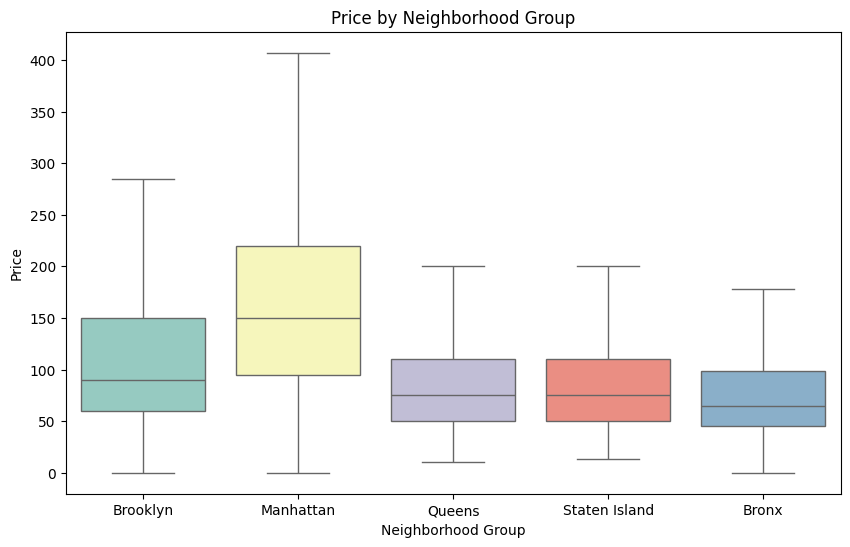

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='neighbourhood_group', y='price', showfliers=False, palette="Set3")
plt.title("Price by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.show()

**Insights:** Manhattan is the most expensive, while Bronx and Staten Island are budget-friendly.

<ipython-input-6-ae4dc6e2e797>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='room_type', palette='muted')


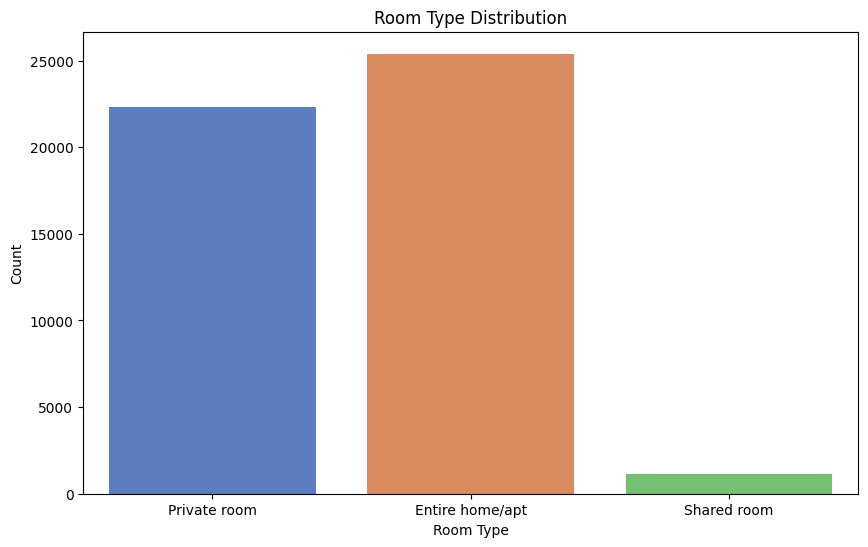

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='room_type', palette='muted')
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

**Insights:** Entire homes are the most common listings, followed by private rooms.

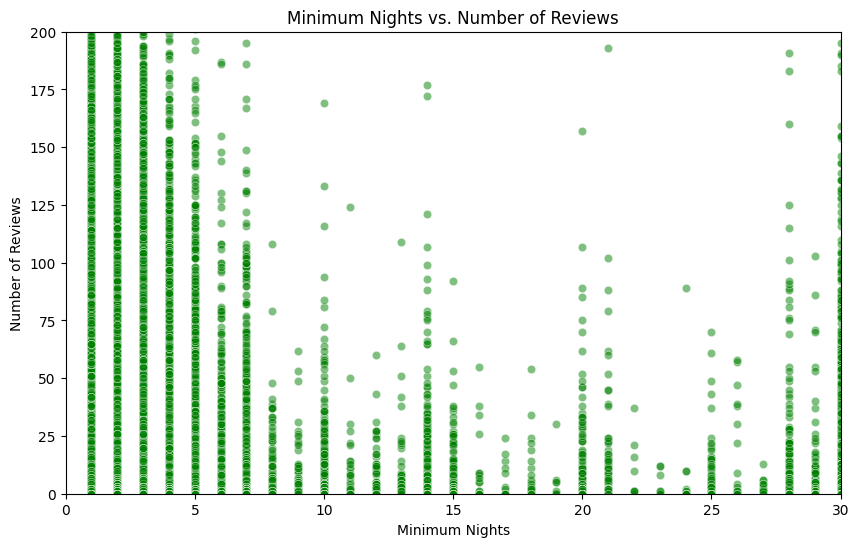

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='minimum_nights', y='number_of_reviews', alpha=0.5, color='green')
plt.title("Minimum Nights vs. Number of Reviews")
plt.xlabel("Minimum Nights")
plt.ylabel("Number of Reviews")
plt.xlim(0, 30)
plt.ylim(0, 200)
plt.show()

**Insights:** Short stays get more reviews, indicating high demand.

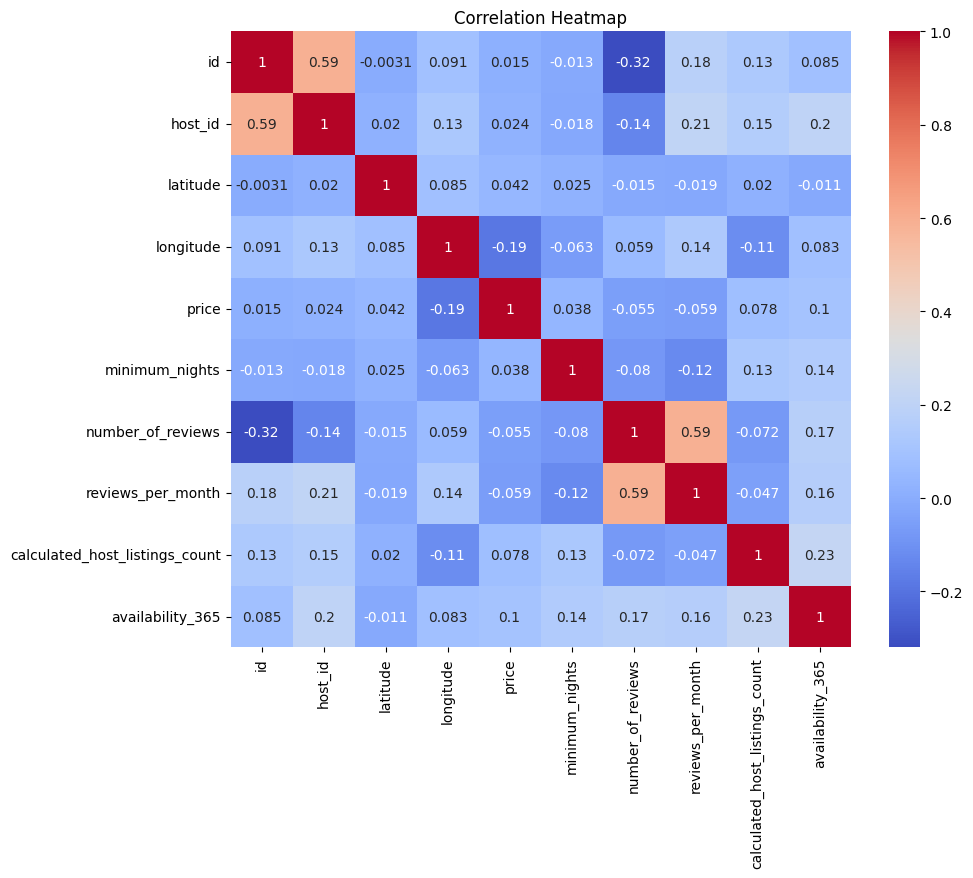

In [10]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Insights:** Price and availability show weak correlations, meaning other factors (e.g., location, room type) drive pricing.

# **Step 4: Business Insights**

**From the analysis:**

1.   **Pricing Strategy:** Promote affordable options in Bronx and Staten Island to attract budget travelers.
2.   **Room Types:** Focus on marketing entire homes in Manhattan and private rooms in Brooklyn.
3.   **Customer Behavior:** Encourage shorter stays for higher reviews and bookings.

